In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import eda_helper_function

In [92]:
file_path=r"C:\Users\siddhant sakhare\Desktop\flight-price-prediction\DATA\train.csv"
train=pd.read_csv(file_path)

In [93]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [16]:
train=train.assign(**{
    col:pd.to_datetime(train.loc[:,col],dayfirst=True,format="mixed")
    for col in ["date_of_journey","dep_time","arrival_time"]
})

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [19]:
train.describe(include="number")

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,638.765625,0.792188,8894.229687
std,493.122853,0.646843,4315.281809
min,75.000000,0.000000,1965.000000
25%,170.000000,0.000000,5196.500000
50%,532.500000,1.000000,8369.000000
75%,943.750000,1.000000,12192.000000
max,2420.000000,2.000000,31825.000000


In [20]:
(
    train
    .assign(total_stops=train["total_stops"].astype(object))
    .describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,8,5,6,3.0,3
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,232,264,264,345.0,495


In [26]:
na_col=[a for a in train.columns if train[a].isna().any()]

In [27]:
na_col

[]

In [29]:
from sklearn.ensemble import IsolationForest
forest =IsolationForest(n_estimators=10,random_state=42)

In [35]:
(
    train
    .assign(outlier=forest.fit_predict(train
                                       .drop(columns="price")
                                       .select_dtypes(include="number")))
    
    .query("outlier==-1")
    
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
3,Air India,2019-05-12,Chennai,Kolkata,2025-03-28 11:40:00,2025-03-28 13:55:00,135,0.0,No Info,4667,-1
4,Spicejet,2019-06-06,Chennai,Kolkata,2025-03-28 09:45:00,2025-03-28 12:00:00,135,0.0,No check-in baggage included,3543,-1
6,Spicejet,2019-03-01,Kolkata,Banglore,2025-03-28 22:20:00,2025-03-28 00:40:00,140,0.0,No Info,5515,-1
9,Indigo,2019-06-09,Delhi,Cochin,2025-03-28 16:00:00,2025-03-28 21:00:00,300,1.0,No Info,6069,-1
11,Indigo,2019-05-15,Mumbai,Hyderabad,2025-03-28 21:20:00,2025-03-28 22:50:00,90,0.0,No Info,2227,-1
...,...,...,...,...,...,...,...,...,...,...,...
627,Jet Airways,2019-05-06,Kolkata,Banglore,2025-03-28 06:30:00,2025-03-28 10:05:00,1655,1.0,In-flight meal not included,8586,-1
628,Air Asia,2019-03-09,Kolkata,Banglore,2025-03-28 22:50:00,2025-03-28 01:20:00,150,0.0,No Info,4384,-1
629,Jet Airways,2019-05-27,Delhi,Cochin,2025-03-28 15:00:00,2025-03-28 19:00:00,1680,1.0,In-flight meal not included,12898,-1
631,Jet Airways,2019-06-03,Mumbai,Hyderabad,2025-03-28 19:35:00,2025-03-28 21:05:00,90,0.0,In-flight meal not included,3210,-1


C:\Users\siddhant sakhare\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


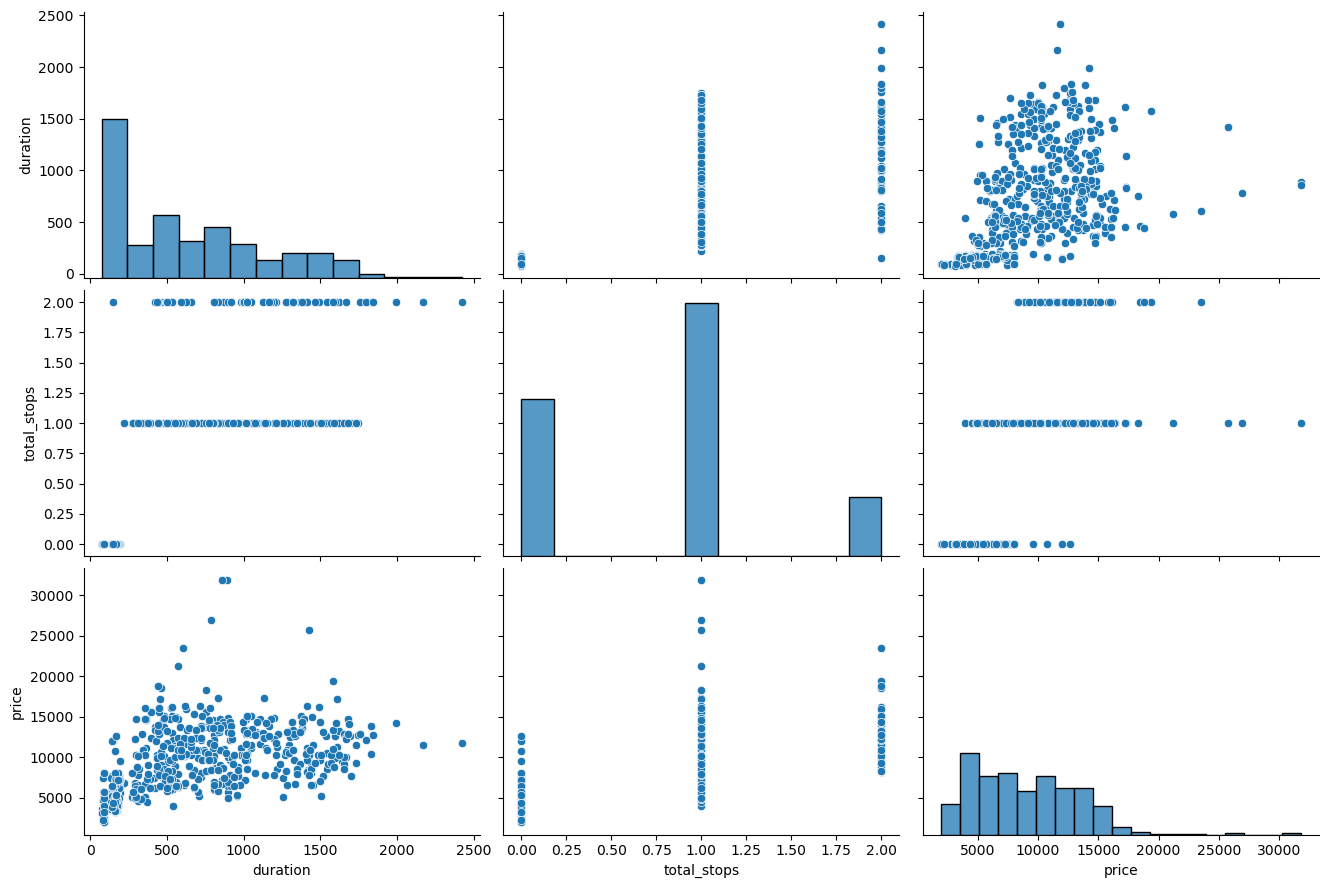

In [41]:
sns.pairplot(train,hue=None,height=3,aspect=1.5)

In [47]:
train.corr(method="spearman",numeric_only=True)

,duration,total_stops,price
duration,1.000000,0.798793,0.684885
total_stops,0.798793,1.000000,0.734001
price,0.684885,0.734001,1.000000


In [48]:
def correlation_heatmap(data,
                        figsize=(12, 6),
                        method="spearman",
                        cmap="RdBu"):
  cm = data.corr(method=method, numeric_only=True)

  mask = np.zeros_like(cm, dtype=bool)
  mask[np.triu_indices_from(mask)] = True

  fig, ax = plt.subplots(figsize=figsize)
  hm = sns.heatmap(
      cm,
      vmin=-1,
      vmax=1,
      cmap=cmap,
      center=0,
      annot=True,
      fmt=".2f",
      linewidths=1.5,
      square=True,
      mask=mask,
      ax=ax
  )
  rotate_xlabels(ax)
  rotate_ylabels(ax)
  ax.set(title=f"{method.title()} Correlation Matrix Heatmap")

NameError: name 'rotate_xlabels' is not defined

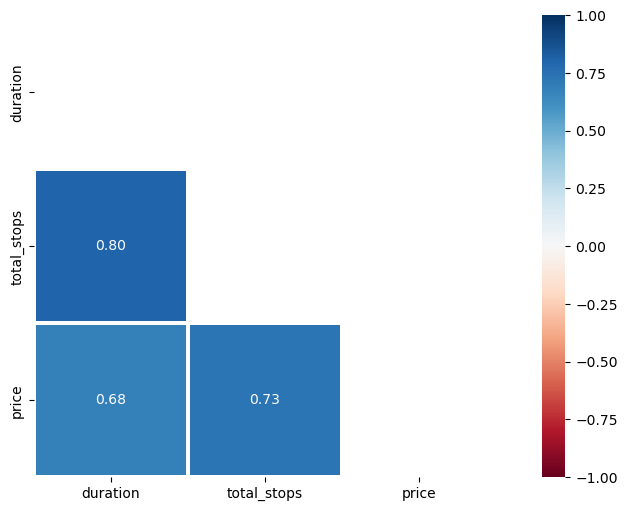

In [49]:
correlation_heatmap(train)

In [56]:
train.columns


Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

In [58]:
train.airline

0      Multiple Carriers
1                 Indigo
2                 Indigo
3              Air India
4               Spicejet
             ...        
635    Multiple Carriers
636             Spicejet
637          Jet Airways
638               Indigo
639              Vistara
Name: airline, Length: 640, dtype: object

In [75]:
 from IPython.display import HTML
from IPython.display import display, HTML

In [80]:
from scipy import stats

def num_num_hyp_testing(data, var1, var2, alpha=0.05):

  temp = (
      data
      .dropna(subset=[var1, var2], how="any")
      .copy()
  )

  # pearson test
  pearson = stats.pearsonr(temp[var1].values, temp[var2].values)
  pvalue = pearson.pvalue
  statistic = pearson.statistic
  
  print(f"- {'Significance Level':21}: {alpha * 100}%")
  print(f"- {'Null Hypothesis':21}: The samples are uncorrelated")
  print(f"- {'Alternate Hypothesis':21}: The samples are correlated")
  print(f"- {'Test Statistic':21}: {statistic}")
  print(f"- {'p-value':21}: {pvalue}")
  if pvalue < alpha:
    print(f"- Since p-value is less than {alpha}, we Reject the Null Hypothesis at {alpha * 100}% significance level")
    print(f"- CONCLUSION: The variables {var1} and {var2} are correlated")
  else:
    print(f"- Since p-value is greater than {alpha}, we Fail to Reject the Null Hypothesis at {alpha * 100}% significance level")
    print(f"- CONCLUSION: The variables {var1} and {var2} are uncorrelated")

  # spearman test
  spearman = stats.spearmanr(temp[var1].values, temp[var2].values)
  pvalue = spearman.pvalue
  statistic = spearman.statistic
  print(f"- {'Significance Level':21}: {alpha * 100}%")
  print(f"- {'Null Hypothesis':21}: The samples are uncorrelated")
  print(f"- {'Alternate Hypothesis':21}: The samples are correlated")
  print(f"- {'Test Statistic':21}: {statistic}")
  print(f"- {'p-value':21}: {pvalue}")
  if pvalue < alpha:
    print(f"- Since p-value is less than {alpha}, we Reject the Null Hypothesis at {alpha * 100}% significance level")
    print(f"- CONCLUSION: The variables {var1} and {var2} are correlated")
  else:
    print(f"- Since p-value is greater than {alpha}, we Fail to Reject the Null Hypothesis at {alpha * 100}% significance level")
    print(f"- CONCLUSION: The variables {var1} and {var2} are uncorrelated")

In [81]:
num_num_hyp_testing(train,"price","duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5440228460790473
- p-value              : 1.3980536224245369e-50
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.684885003514203
- p-value              : 8.92330206066523e-90
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


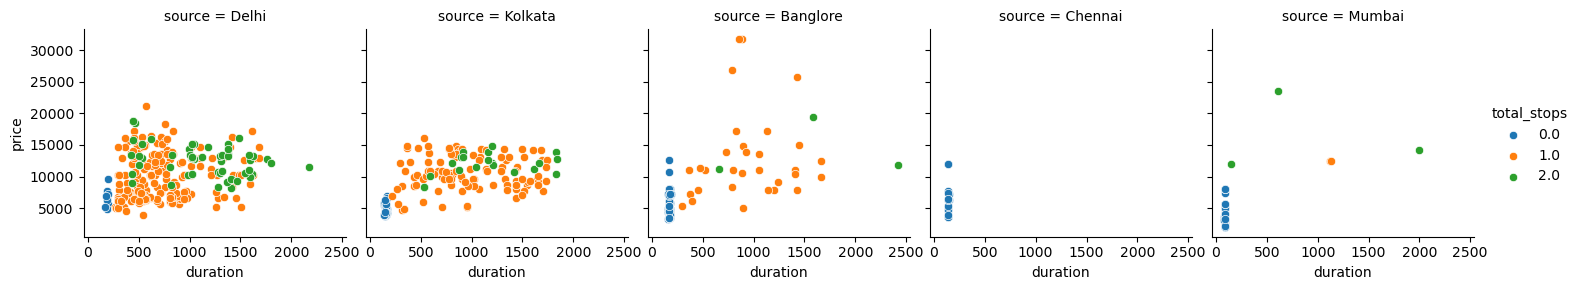

In [82]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

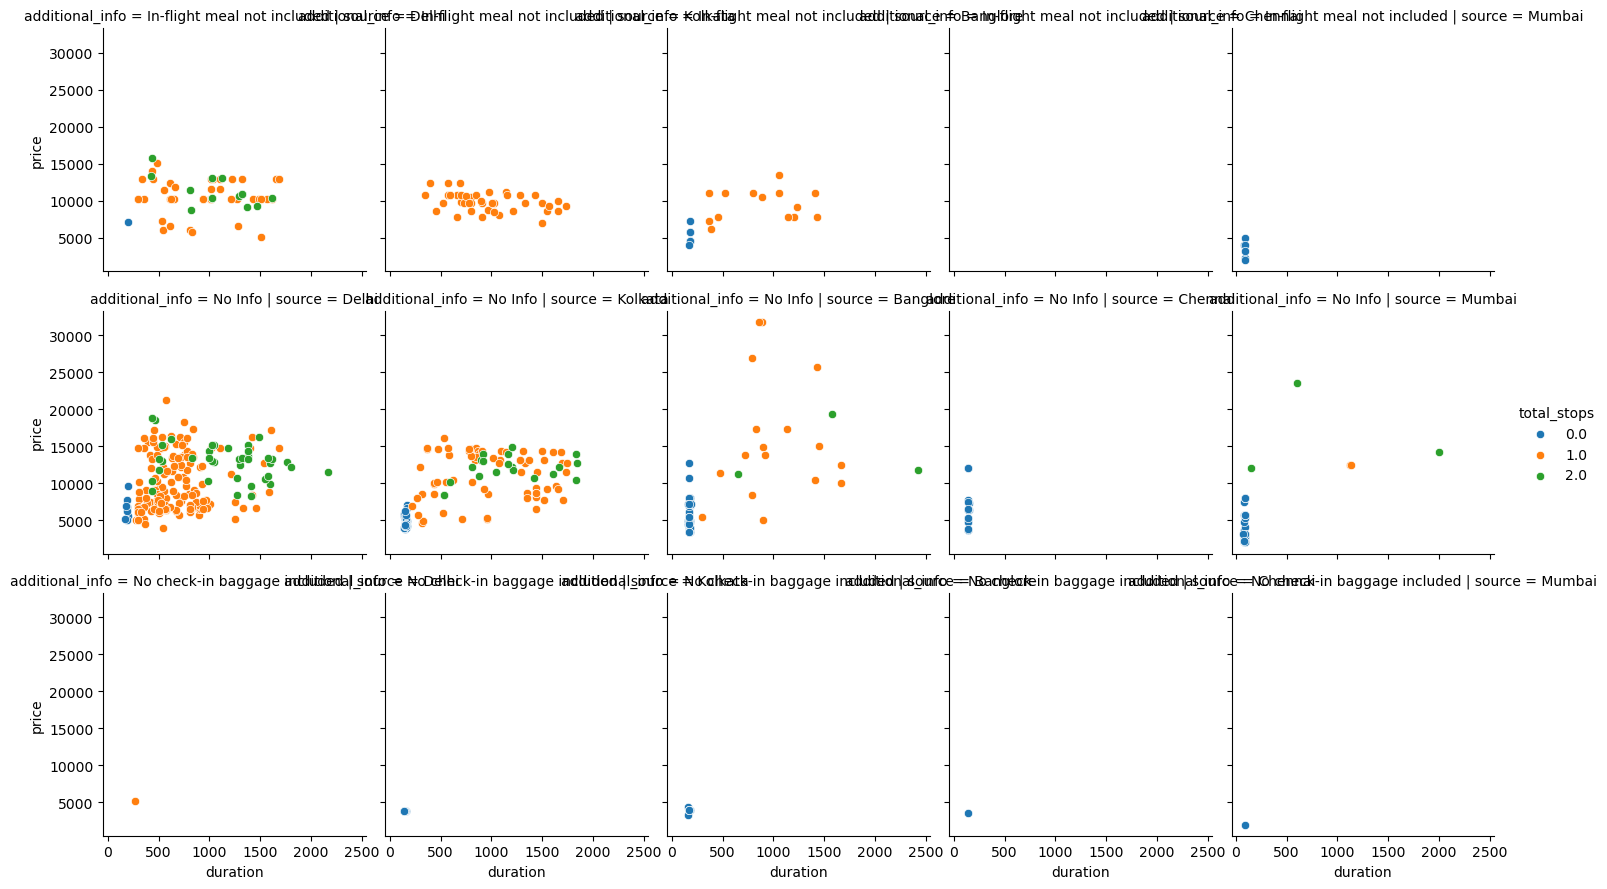

In [83]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	row="additional_info",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

In [88]:
pip install ydata-profiling

  Obtaining dependency information for ydata-profiling from https://files.pythonhosted.org/packages/79/70/1430ad64b36c3d11abd222a95c1568ee56f5a23b07224c699f2b64825bb9/ydata_profiling-4.16.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pydantic>=2 from https://files.pythonhosted.org/packages/09/2c/3a0a1b022bb028e4cd455c69a17ceaad809bf6763c110d093efc0d8f67aa/pydantic-2.11.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/63.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/63.1 kB ? eta -:--:--
     ------ --------------------------------- 10.2/63.1 kB ? eta -:--:--
     ------ --------------------------------- 10.2/63.1 kB ? eta -:--:--
     ------ --------------------------------- 10.2/63.1 kB ? eta -:--:--
     -------------------------------------- 63.1/63.1 kB 339.2 kB/s eta 0:00:00
  Obtaining dependency information for visions[type_image_path]<0.8.2,>=0.7.5 from https://files.pythonhosted.org/packages/90/36/4a0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.3 requires pydantic<2.0, but you have pydantic 2.11.0 which is incompatible.


In [90]:
from ydata_profiling import ProfileReport

ImportError: cannot import name 'TypeIs' from 'typing_extensions' (C:\Users\siddhant sakhare\anaconda3\Lib\site-packages\typing_extensions.py)

In [86]:
report = ProfileReport(train)

NameError: name 'ProfileReport' is not defined